In [ ]:
# Simple Linear Regression with Scikit-Learn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from urllib.request import urlretrieve

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
output_file = "FuelConsumption.csv"

# I could just say "df = pd.read_csv('https://...", but in that case I wouldn't have had it saved 

import os
if not os.path.exists(output_file):  # if the file doesn't exist in this directory
    urlretrieve(url, output_file)
else:
    pass

In [3]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# data cleaning (check the file)
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(6)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

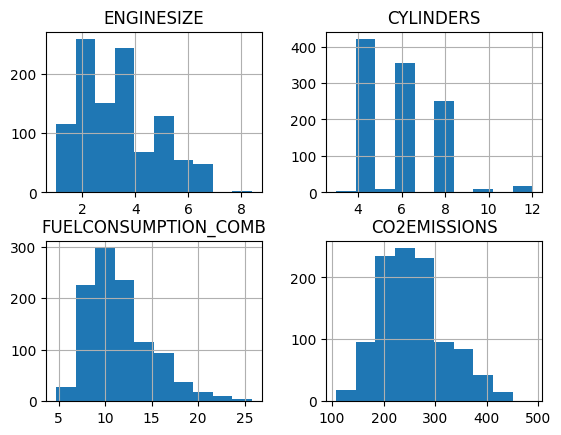

In [20]:
cdf.hist()

Text(0, 0.5, 'CO2EMISSIONS')

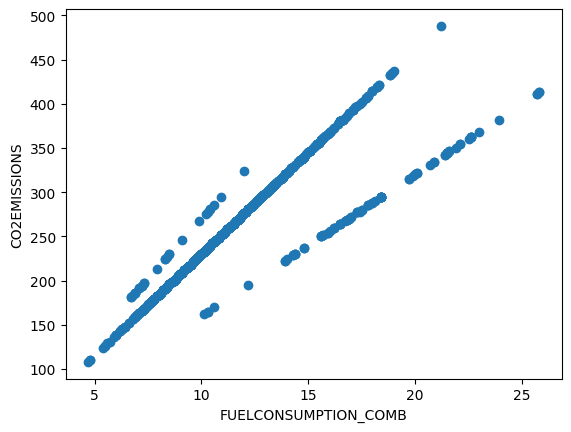

In [21]:
# scatter plot for FUELCONSUMPTION_COMB
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'])
# OR
# plt.scatter(viz.FUELCONSUMPTION_COMB, viz.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

In [ ]:
# Create linear regression model using Scikit-Learn library
# we use Scikit-Learn in Classical Machine Learning: Linear regression, logistic regression, decision trees, random forests, support vector machines (SVMs), etc.
from sklearn.linear_model import LinearRegression

# Reshape the data for scikit-learn
X = cdf[['FUELCONSUMPTION_COMB']].values  # in scikit-learn X must be a 2D array  # .values: convert pndas to numpy (in scikit-learn X and y are better to be numpy array for better performance than pandas df)
# OR
# X = viz.FUELCONSUMPTION_COMB.values.reshape(-1, 1)
# .reshape(-1, 1): convert that column which is a 1D array to a 2D array with that n rows (-1) and 1 column
y = cdf['CO2EMISSIONS'].values  # y can be either 1D or 2D
# OR
# Y = viz.CO2EMISSIONS.values


# Fit (create) the model
reg = LinearRegression().fit(X, y)

# get a prediction
predictor_FUELCONSUMPTION_COMB = [[23]]  # cause X must be a 2D array
# and if we want to do this ^ we should add .values to X and y to convert pandas dataframe to numpy array (or istead of [[23]] which is numpy I use pandas)
target_CO2EMISSIONS = reg.predict(predictor_FUELCONSUMPTION_COMB)
print(target_CO2EMISSIONS)

[441.44644958]


Text(0, 0.5, 'CO2EMISSIONS')

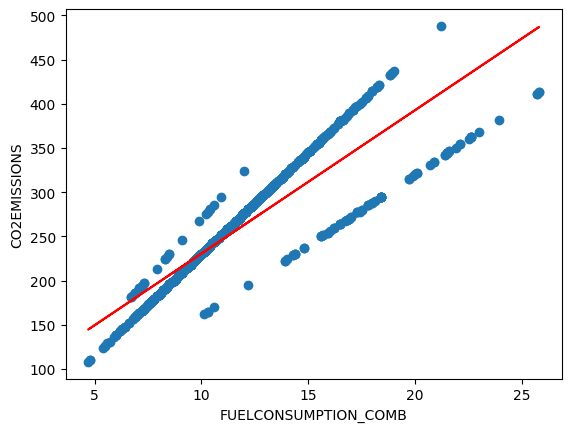

In [23]:
# draw linear regression line

# scatter plot (we can skip drawing this)
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'])

# regression line
plt.plot(X, reg.predict(X), color='red')  # color='red' OR just 'r'

plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

For Linear Regression, you cannot directly use strings/categorical variables (like 'MAKE'). You need to convert categorical variables to numerical values first using techniques like:

1. One-Hot Encoding: <br> X = pd.get_dummies(df['MAKE'])
2. Label Encoding:
<br>from sklearn.preprocessing import LabelEncoder
<br>le = LabelEncoder()
<br>X = le.fit_transform(df['MAKE']).reshape(-1, 1)

Creating train and test datasets

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X and y can in here can be both np.array or pandas dataframe (the output type will be the same as the input type)

# Could print shapes to verify split
# print("Training shape:", X_train.shape, y_train.shape)
# print("Testing shape:", X_test.shape, y_test.shape)

# Train a linear regression model
model = LinearRegression().fit(X_train, y_train)
# note that since we use train_test_split, no need to use ".values" anymore (X_train.values)

# Evaluate the model on test data to get these metrics
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)  # less popular
MSE = mean_squared_error(y_test, y_pred)  # more popular than MAE  # used in mathematical optimization
# used as MSE/var: the closer to 0, the better
RMSE = np.sqrt(MSE) # more popular than MSE  # when use when we want ot focuse on the accuracy of predictions in practical regression tasks.
# compared with range: the less, the better
R2 = r2_score(y_test, y_pred)  # is used in business or academic contexts
# the colser to 1, the better
# R² ranges from 0 to 1 (or 0% to 100%), where values close to 1 indicate a good model (values above 0.7 (70%) generally considered good in most contexts) fit while values close to 0 suggest the model is performing poorly as it's not explaining much of the variance in the target variable.

print('MAE:', MAE, '\n'
      'MSE:', MSE, '\n'
      'RMSE:', RMSE, '\n'
      'R2-score:', R2)

MAE: 20.441911472549585 
MSE: 797.4346310097205 
RMSE: 28.238885087937174 
R2-score: 0.8071474868274242


In [25]:
# assess the model based on RMSE and Range (more popular than MSE)
# the closer RMSE is to the min, the better the model is, but for example if the min is 50, the RMSE of 10 is better than the RMSE of 30
print('range:', np.min(y), 'to', np.max(y))
print('RMSE:', RMSE)
# This means your average prediction error is only about 7.4% of your total range (28.2/380)

range: 108 to 488
RMSE: 28.238885087937174


In [26]:
# assess the model based on MSE and Variance
print("Variance of y:", np.var(y))
print("Ratio (MSE/Variance):", MSE/np.var(y))
# If the MSE is significantly smaller than the variance, the model is performing well (lower error compared to the natural variability in the data).
# If the ratio is:
# Close to 1: Your model isn't doing much better than predicting the mean
# Much less than 1: Your model is capturing the relationships in the data well
# Greater than 1: Your model is performing worse than just predicting the mean (not good!)

Variance of y: 4012.2851006904766
Ratio (MSE/Variance): 0.1987482471952179


In [27]:
# if my X variable is categorical

X_cat = df[['MAKE']]
y2 = df['CO2EMISSIONS']

X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)
# but in fact, in linear reg and knn it's better to use pd.get_dummies for nominal categoricals and use preprocessing.LabelEncoder() for ordinal categoricals
# unike tree based models that is always safe to use .LabelEncoder()

X_cat_encoded.head() # just ot understand

,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,...,MAKE_PORSCHE,MAKE_RAM,MAKE_ROLLS-ROYCE,MAKE_SCION,MAKE_SMART,MAKE_SRT,MAKE_SUBARU,MAKE_TOYOTA,MAKE_VOLKSWAGEN,MAKE_VOLVO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_cat_encoded, y2, test_size=0.2, random_state=42)

model_cat = LinearRegression().fit(X2_train, y2_train)

y2_pred = model_cat.predict(X2_test)
MSE2 = mean_squared_error(y2_test, y2_pred)
MSE2

2577.882343603188